This notebook shows how to run the ssm-jax demos from inside a notebook.

In [1]:
try:
    import optax
except ModuleNotFoundError:
    %pip install optax
    import optax


try:
    import tensorflow_probability as tfp
except ModuleNotFoundError:
    %pip install -qq tensorflow-probability
    import tensorflow_probability as tfp

try:
    import distrax
except ModuleNotFoundError:
    %pip install distrax
    import distrax

In [2]:
try:
    import ssm_jax
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/ssm-jax.git
    import ssm_jax

In [3]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [4]:
import jax.numpy as jnp
import jax.random as jr
from jax import jit, value_and_grad

# LG-SSM

prior sigma [[0.1 0.  0.  0. ]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  0.1]]


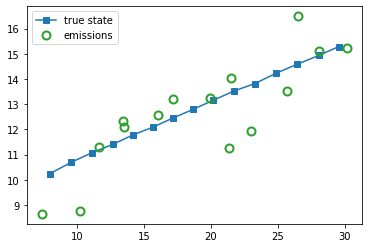

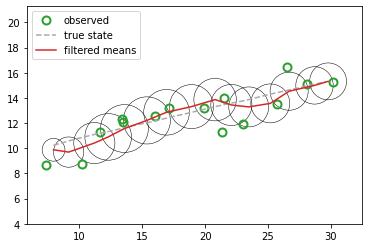

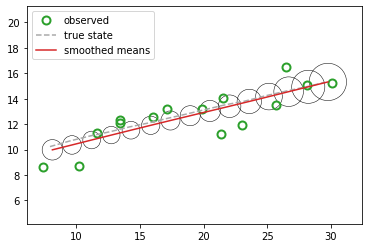

In [24]:
# Here we run the demo end-to-end

import ssm_jax.linear_gaussian_ssm.demos.kf_tracking as demo

demo.main()

prior sigma [[0.1 0.  0.  0. ]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  0.1]]
kalman_tracking_truth.pdf
kalman_tracking_filtered.pdf
kalman_tracking_smoothed.pdf


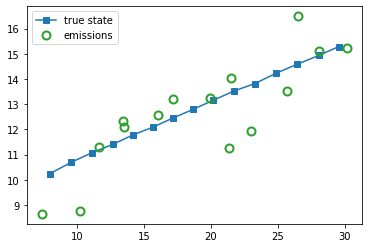

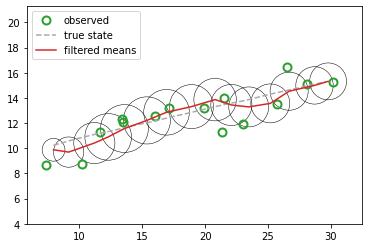

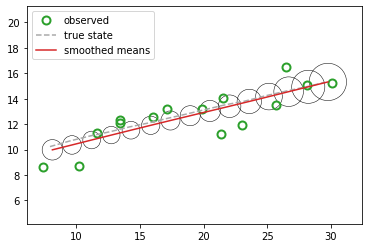

In [25]:
# Here we show how to create all the figures and save them

from ssm_jax.linear_gaussian_ssm.demos.kf_tracking import kf_tracking, plot_kf_tracking

x, y, lgssm_posterior = kf_tracking()
dict_figures = plot_kf_tracking(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

spiral_data.pdf
spiral_filtered.pdf
spiral_smoothed.pdf


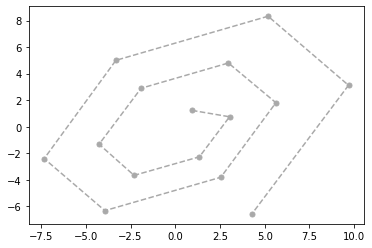

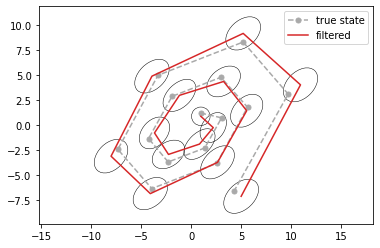

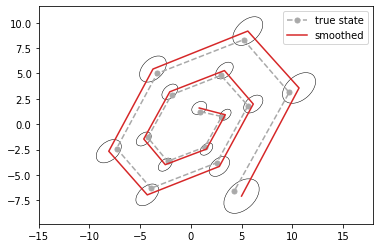

In [26]:
# Here we show how to create all the figures and save them

from ssm_jax.linear_gaussian_ssm.demos.kf_spiral import kf_spiral, plot_kf_spiral

x, y, lgssm_posterior = kf_spiral()
dict_figures = plot_kf_spiral(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

missiles_latent.pdf
missiles_filtered.pdf
missiles_smoothed.pdf


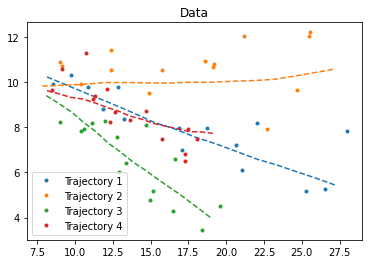

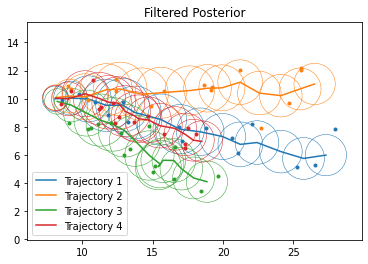

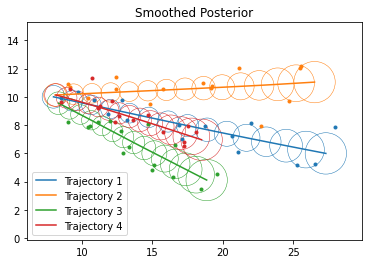

In [27]:
# Here we show how to create all the figures and save them

from ssm_jax.linear_gaussian_ssm.demos.kf_parallel import kf_parallel, plot_kf_parallel

x, y, lgssm_posterior = kf_parallel()
dict_figures = plot_kf_parallel(x, y, lgssm_posterior)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

# HMM

In [28]:
from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results

hmm, true_states, emissions = make_model_and_data()
posterior = hmm.smoother(emissions)
most_likely_states = hmm.most_likely_states(emissions)
dict_figures = plot_results(true_states, emissions, posterior, most_likely_states)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

Printing sample observed/latent...
hid:  111111111122221111111111111111111111222222222122221111111111


TypeError: sequence item 0: expected str instance, numpy.ndarray found

/home/libi/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


log joint prob:     3149.1013
log marginal prob:  3149.1047
hmm_gauss_2d_emissions.pdf
hmm_gauss_2d_trace.pdf


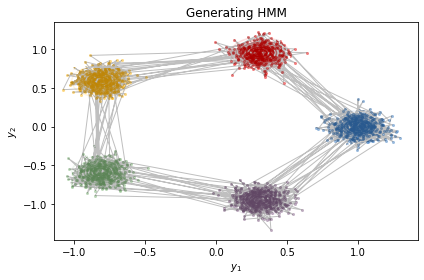

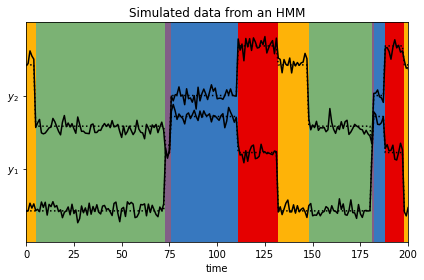

In [ ]:
from ssm_jax.hmm.demos.gaussian_hmm_2d import make_hmm, plot_results

num_timesteps = 2000
plot_timesteps = 200
true_hmm = make_hmm()
true_states, emissions = true_hmm.sample(jr.PRNGKey(0), num_timesteps)
dict_figures = plot_results(true_hmm, emissions, true_states, plot_timesteps)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

## Stochastic EM fit

Demonstrate GaussianHMM fit via exact EM and stochastic EM algorithms.

/home/libi/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


log joint prob:     8053.1074
log marginal prob:  8053.104
hmm_gauss_2d_emissions.pdf
hmm_gauss_2d_trace.pdf


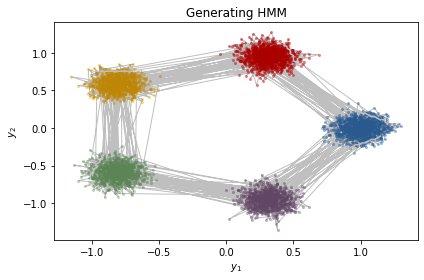

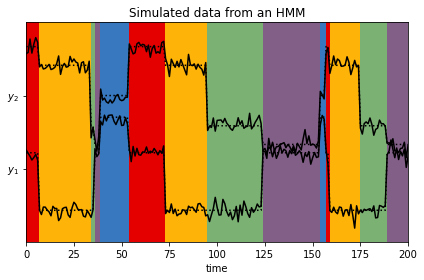

In [5]:
from jax import vmap
from ssm_jax.hmm.models import GaussianHMM
import ssm_jax.hmm.learning as learn
from ssm_jax.hmm.demos.gaussian_hmm_2d import (
    make_hmm, plot_results, plot_hmm_posterior, plot_gaussian_hmm, plot_gaussian_hmm_data)

import matplotlib.pyplot as plt

num_batches = 9
num_timesteps = 5000
plot_timesteps = 200

true_hmm = make_hmm()
batch_true_states, batch_emissions = \
    vmap(true_hmm.sample, in_axes=(0, None))(jr.split(jr.PRNGKey(0), num_batches), num_timesteps)
dict_figures = plot_results(true_hmm, batch_emissions[0], batch_true_states[0], plot_timesteps)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)

Fitting via exact EM...


100%|██████████| 50/50 [00:02<00:00, 21.22it/s]



Fitting via stochastic EM (no progress bar)...
	Done


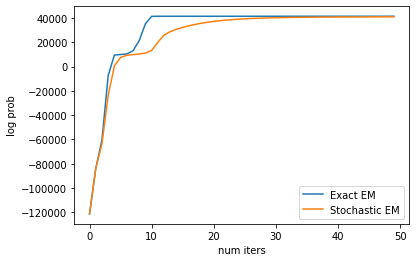

In [6]:
# Initialize HMMs, with inexact number of states
hmm_exact = GaussianHMM.random_initialization(
    jr.PRNGKey(1), true_hmm.num_states, true_hmm.num_obs
)
hmm_stoch = GaussianHMM.random_initialization(
    jr.PRNGKey(1), true_hmm.num_states, true_hmm.num_obs
)

# Fit
num_iters = 50

print('Fitting via exact EM...')
hmm_exact, lps_exact = learn.hmm_fit_em(hmm_exact, batch_emissions, num_iters)

print()
print('Fitting via stochastic EM (no progress bar)...')
hmm_stoch, lps_stoch = learn.hmm_fit_stochastic_em(
    hmm_stoch, batch_emissions,
    batch_size=len(batch_emissions//3), num_iters=num_iters,
    key=jr.PRNGKey(2),
    )
print('\tDone')

# Plot log probs vs num_iterations
plt.plot(jnp.arange(len(lps_exact)), lps_exact, label='Exact EM')
plt.plot(jnp.arange(len(lps_stoch)), lps_stoch, label='Stochastic EM')
plt.xlabel('num iters')
plt.ylabel('log prob')
plt.legend();

In [8]:
# from lindermanlab/ssm code
from scipy.optimize import linear_sum_assignment
import numpy as np
def compute_state_overlap(z1, z2, K1=None, K2=None):
    assert z1.dtype == int and z2.dtype == int
    assert z1.shape == z2.shape
    assert z1.min() >= 0 and z2.min() >= 0

    K1 = z1.max() + 1 if K1 is None else K1
    K2 = z2.max() + 1 if K2 is None else K2

    overlap = np.zeros((K1, K2))
    for k1 in range(K1):
        for k2 in range(K2):
            overlap[k1, k2] = np.sum((z1 == k1) & (z2 == k2))
    return overlap
    
def find_permutation(z1, z2, K1=None, K2=None):
    overlap = compute_state_overlap(z1, z2, K1=K1, K2=K2)
    K1, K2 = overlap.shape

    tmp, perm = linear_sum_assignment(-overlap)
    assert np.all(tmp == np.arange(K1)), "All indices should have been matched!"

    # Pad permutation if K1 < K2
    if K1 < K2:
        unused = np.array(list(set(np.arange(K2)) - set(perm)))
        perm = np.concatenate((perm, unused))

    return perm


exact em result
stochastic em result


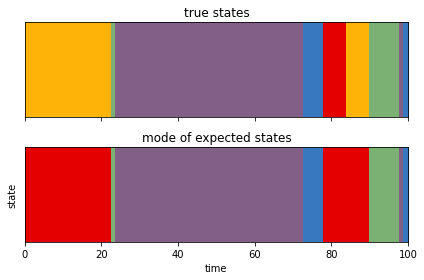

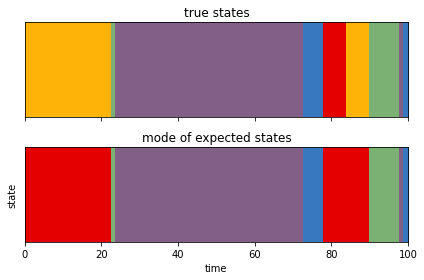

In [24]:
# TODO Good news: Exact and stochastic fits give same results
# Bad news: Both are making the same mistakes. Maybe just due to bad init?
b=5

# Exact EM result
print('exact em result')
posterior_exact = hmm_stoch.smoother(batch_emissions[b])
most_likely_exact = jnp.argmax(posterior_exact.smoothed_probs, axis=-1)
perm_exact = find_permutation(np.array(batch_true_states[b], dtype=int),
                              np.array(most_likely_exact, dtype=int))
plot_hmm_posterior(batch_true_states[b], posterior_exact,
                   perm=perm_exact, plot_mode=True, plot_timesteps=100)

# Stochastic EM result
print('stochastic em result')
posterior_stoch = hmm_stoch.smoother(batch_emissions[b])
most_likely_stoch = jnp.argmax(posterior_stoch.smoothed_probs, axis=-1)
perm_stoch = find_permutation(np.array(batch_true_states[b], dtype=int),
                              np.array(most_likely_stoch, dtype=int))
plot_hmm_posterior(batch_true_states[b], posterior_stoch,
                   perm=perm_stoch, plot_mode=True, plot_timesteps=100);

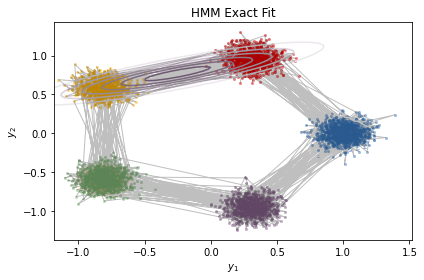

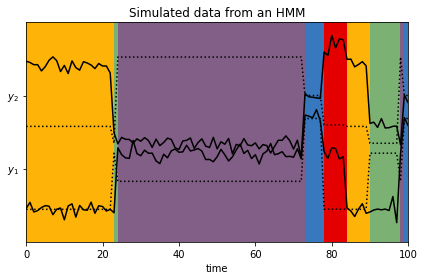

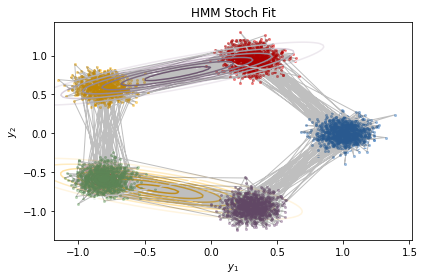

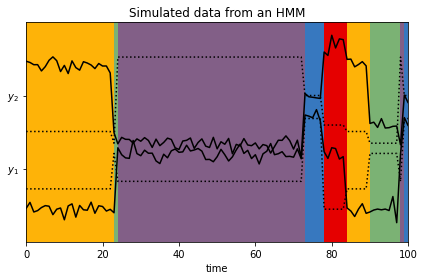

In [38]:
# TODO plotting functions need to be able to permute
b = 5
plot_gaussian_hmm(hmm_exact, batch_emissions[b], batch_true_states[b], "HMM Exact Fit")
plot_gaussian_hmm_data(hmm_exact, batch_emissions[b], batch_true_states[b], xlim=(0, 100))

plot_gaussian_hmm(hmm_stoch, batch_emissions[b], batch_true_states[b], "HMM Stoch Fit");
plot_gaussian_hmm_data(hmm_stoch, batch_emissions[b], batch_true_states[b], xlim=(0, 100));